## Шаг 1. Загрузить данные и подготовить их к анализу

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#настроим опцию отображения чисел с плавающей запятой
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
#откроем файлы с данными
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [4]:
#изучим общую информацию датасета visits
print(visits.info())
display(visits.describe())
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


,Source Id,Uid
count,359400.00,359400.00
mean,3.75,9202556994354921472.00
std,1.92,5298432824659611648.00
min,1.00,11863502262781.00
25%,3.00,4613406732167550976.00
50%,4.00,9227412908740601856.00
75%,5.00,13728237011236173824.00
max,10.00,18446676030785673216.00


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
#изучим общую информацию датасета orders
print(orders.info())
display(orders.describe())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


,Revenue,Uid
count,50415.00,50415.00
mean,5.00,9098160634289729536.00
std,21.82,5285741550834715648.00
min,0.00,313578113262317.00
25%,1.22,4533566627250599936.00
50%,2.50,9102273602618561536.00
75%,4.89,13682901980465401856.00
max,2633.28,18446167067214817280.00


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
#изучим общую информацию датасета costs
print(costs.info())
display(costs.describe())
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


,source_id,costs
count,2542.00,2542.00
mean,4.86,129.48
std,3.18,156.30
min,1.00,0.54
25%,2.00,21.95
50%,4.00,77.30
75%,9.00,170.06
max,10.00,1788.28


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Первый взгляд на датасеты не выявил значительных проблем. Из того же, что необходимо исправить перед началом работы, можно назвать разномастно названные столбцы (необходимо будет переименовать) и то, что данные в столбцах с датами имеют тип данных `object` (необходимо будет изменить на `datetime`).

In [7]:
#заменим названия столбцов (приведем к нижнему регистру и заменим пробелы на '_')
visits.columns =  [col.lower().replace(' ', '_') for col in visits.columns]
orders.columns =  [col.lower().replace(' ', '_') for col in orders.columns]
#проверка
print(visits.columns)
print(orders.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [8]:
#заменим типы данных в датасетах на корректные
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y.%m.%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y.%m.%d %H:%M:%S')
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y.%m.%d %H:%M:%S')
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y.%m.%d')
#проверка
display(visits.dtypes)
display(orders.dtypes)
display(costs.dtypes)

device               object
end_ts       datetime64[ns]
source_id             int64
start_ts     datetime64[ns]
uid                  uint64
dtype: object

buy_ts     datetime64[ns]
revenue           float64
uid                uint64
dtype: object

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object

In [9]:
#проверим датасеты на наличие пропусков в них
display(visits.isna().sum())
display(orders.isna().sum())
display(costs.isna().sum())

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

buy_ts     0
revenue    0
uid        0
dtype: int64

source_id    0
dt           0
costs        0
dtype: int64

In [10]:
#проверим датасеты на наличие дубликатов в них
print('Кол-во дубликатов в датасете visits: ', visits.duplicated().sum())
print('Кол-во дубликатов в датасете orders: ', orders.duplicated().sum())
print('Кол-во дубликатов в датасете costs: ', costs.duplicated().sum())

Кол-во дубликатов в датасете visits:  0
Кол-во дубликатов в датасете orders:  0
Кол-во дубликатов в датасете costs:  0


### Промежуточный вывод по этапу предобработки

По итогу этапа предобработки данных были исправлены основные ошибки исходных датафреймов: названия столбцов были приведены к общепринятому виду, а типы данных в столбцах с датами были исправлены на `datetime`, что позволит работать с ними полноценно.

Кроме того, попутно были проведены дополнительные проверки на наличие пропусков и дубликатов в данных, в ходе которых ничего обнаружено не было: с данными можно смело работать.

## Шаг 2. Построить отчёты и посчитать метрики

### Продуктовые метрики

#### Сколько людей пользуются в день, неделю, месяц?

Среднее количество уникальных пользователей в день (DAU):  907
Среднее количество уникальных пользователей в неделю (WAU):  5716
Среднее количество уникальных пользователей в месяц (MAU):  23228


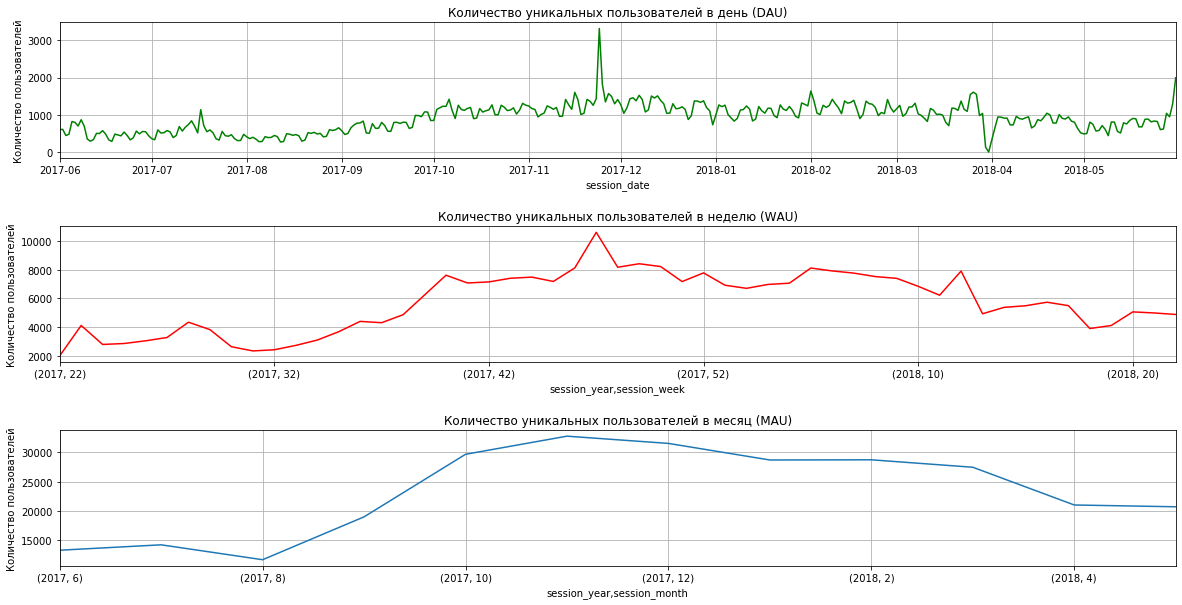

In [11]:
#определим, сколько людей пользуются продуктом в день, неделю и месяц
df_visits = visits.copy()
#добавим в датасет столбцы с годом, неделей, месяцем и датой сессии
df_visits['session_year']  = df_visits['start_ts'].dt.year
df_visits['session_week']  = df_visits['start_ts'].dt.week
df_visits['session_month'] = df_visits['start_ts'].dt.month
df_visits['session_date'] = df_visits['start_ts'].dt.date
#рассчитаем показатели пользовательской активности
dau_total = df_visits.groupby('session_date').agg({'uid': 'nunique'})
wau_total = df_visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
mau_total = df_visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
#выведем на экран
print('Среднее количество уникальных пользователей в день (DAU): ', int(dau_total.mean()))
print('Среднее количество уникальных пользователей в неделю (WAU): ', int(wau_total.mean()))
print('Среднее количество уникальных пользователей в месяц (MAU): ', int(mau_total.mean()))
#построим графики
plt.subplots(figsize = (20, 10))
plt.subplots_adjust(hspace=0.5)
dau_total.plot(ax=plt.subplot(311), color='green', grid=True, legend=False)\
        .set_title('Количество уникальных пользователей в день (DAU)')
plt.ylabel('Количество пользователей')
wau_total.plot(ax=plt.subplot(312), color='red', grid=True, legend=False)\
        .set_title('Количество уникальных пользователей в неделю (WAU)')
plt.ylabel('Количество пользователей')
mau_total.plot(ax=plt.subplot(313), grid=True, legend=False).set_title('Количество уникальных пользователей в месяц (MAU)')
plt.ylabel('Количество пользователей')
plt.show()

По итогам расчетов было вычислено, что показатель количества уникальных пользователей в день (DAU) равен в среднем 907 человекам. График по дням данного показателя демонстрирует нам, что в начале отчетного периода DAU был меньше вышеназванного значения, однако в сентябре-октябре 2017-го года случился рост данного показателя, после чего он зафиксировался на этом уровне вплоть до конца марта 2018-го года. Вероятно, такой рост вызван качественными улучшениями в продукте (прежние пользователи с бОльшим желанием пользуются сервисом) или успешной маркетинговой акцией (приток новых пользователей). Также стоит отметить, что во второй половине ноября зафиксирован всплеск пользовательской активности, в результате чего, показатель вырос в два раза, однако это является лишь единовременным выбросом. Возможно, это является следствием маркетинговой рассылки (вероятно, в преддверии Нового года): получив информацию о выгодном предложении, пользователи решили воспользоваться им или получить больше информации, для чего и воспользовались сервисом. В период с марта 2018-го года и до конца отчетного периода мы видим снижение показателя DAU примерно в 1,5 раза. Возможно, такая динамика вызвана стабильностью работы сервиса, ведь в самом конце марта мы замечаем разовое аномальное падение показателя до нуля, что характерно в ситуации технических проблем.

Графики показателей WAU и MAU повторяют динамику DAU и без лишних шумов демонстрируют нам все тенденции роста и снижения пользовательсткой активности в рамках сервиса. Как итог, можно заметить, что по завершении отчетного периода число активных пользователей выросло, однако этот показатель мог быть и выше: такие показатели были достигнуты, но в последствии утеряны - в результате чего - необходимо выснить и провести работу над ошибками.

#### Сколько сессий в день?

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.10
2017-06-02,658,608,1.08
2017-06-03,477,445,1.07
2017-06-04,510,476,1.07
2017-06-05,893,820,1.09
...,...,...,...
2018-05-27,672,620,1.08
2018-05-28,1156,1039,1.11
2018-05-29,1035,948,1.09


Среднее количество сессий в день:  987.3626373626373
Среднее количество сессий в день на одного пользователя:  1.082169644003972


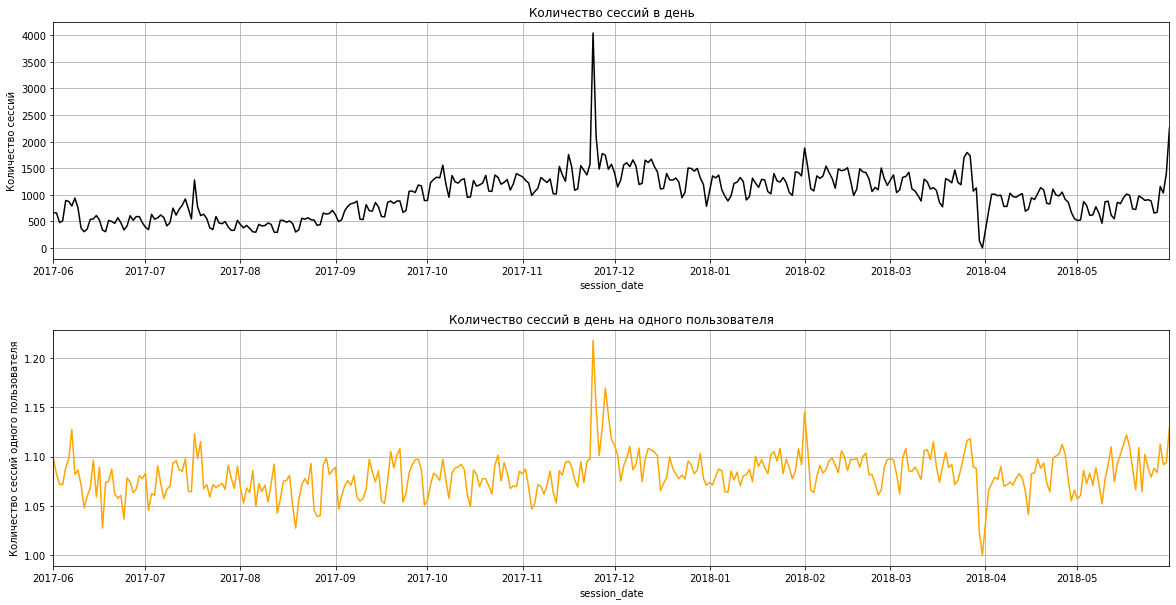

In [12]:
#определим количество сессий в день
sessions_per_user = df_visits.groupby('session_date').agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
display(sessions_per_user)
#выведем результаты на экран
print('Среднее количество сессий в день: ', (sessions_per_user['n_sessions'].sum() / sessions_per_user['n_sessions'].count()))
print('Среднее количество сессий в день на одного пользователя: ', (sessions_per_user['sessions_per_user'].mean()))
#построим график
plt.subplots(figsize=(20,10))
plt.subplots_adjust(hspace=0.3)
sessions_per_user['n_sessions'].plot(ax=plt.subplot(211), color='black', grid=True)\
        .set_title('Количество сессий в день')
plt.ylabel('Количество сессий')
sessions_per_user['sessions_per_user'].plot(ax=plt.subplot(212), color='orange', grid=True)\
        .set_title('Количество сессий в день на одного пользователя')
plt.ylabel('Количество сессий одного пользователя')
plt.show()

В результате расчетов были вычислено, что среднее количество сессий в день равно  987, а на одного пользователя - 1.08.

На графике количества сессий  в день так же, как и на графике DAU можно заметить рост в промежутке август-сентябрь 2017-го года, а затем график стабилизируется вплоть до конца марта 2018-го года, после которого идет снижение поазателя. Однако, проанализировав параллельно график числа ежедневных сессий одного пользователя, мы можем заметить, что за исключением известных нам выбросов показатель практически не изменился по прошествии отчетного периода, а значит, пользователи в среднем не стали пользоваться сервисом активнее. Это означает, что выдвинутая ранее гипотеза о том, что рост показателей связан с качественными изменениями в сервисе, и пользователи просто пользуются им чаще, скорее всего, неверна. Скорее всего, изменения количества сессий в день связаны именно с притоком и оттоком пользователей, которые могли быть вызваны маркетингом, техническими/косметическими изменениями или изменениями в политике сервиса.

#### Сколько длится одна сессия?

Средняя продолжительность сессии (ASL): 60 секунд


Text(0, 0.5, 'Продолжительность сессии, сек.')

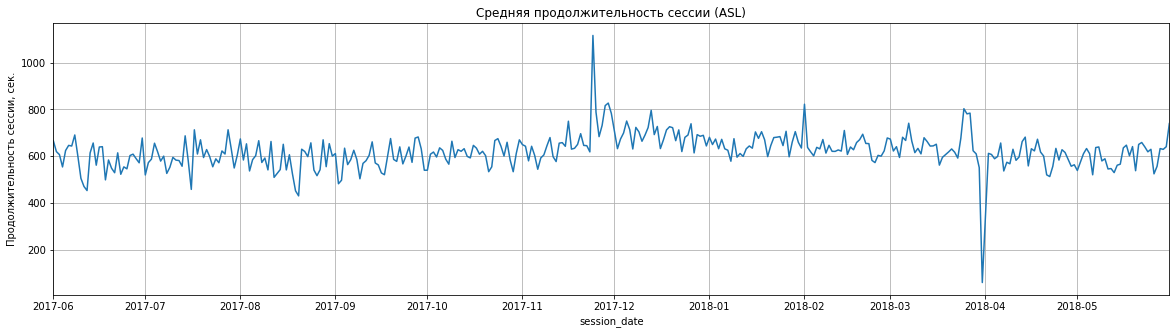

In [13]:
#определим, сколько длится одна сессия
df_visits['session_duration_sec'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
print('Средняя продолжительность сессии (ASL): {} секунд'.format(int(df_visits['session_duration_sec'].mode())))
#построим график
plt.subplots(figsize=(20,5))
df_visits.groupby('session_date')['session_duration_sec'].mean().plot(grid=True)\
        .set_title('Средняя продолжительность сессии (ASL)')
plt.ylabel('Продолжительность сессии, сек.')

В результате расчетов было вычислено, средняя продолжительность сессии (ASL) равна 60 секундам.

Взглянув на график показателя, можно заметить, что его рост наметился только после всплеска пользовательской активности в конце ноября 2017-го года, вызванного, скорее всего, маркетинговой рассылкой в преддверии Нового года. Затем, в последних числах марта, мы отмечаем единоразовое резкое падение продолжительности сессии - это лишь подтверждает вышеупомянутое предположение о произошедшем в этот период техническом сбое. После этого и до конца отчетного периода средняя продолжительность сессии незначительно сокращается.

#### Как часто люди возвращаются?

In [15]:
#получим таблицу с датами первых визитов
first_visits = (visits.sort_values(by = ['uid', 'start_ts']).groupby('uid', as_index=False)\
         .agg({'start_ts' : 'first', 'source_id': 'first', 'device': 'first'}))
first_visits = first_visits\
        .rename(columns={'start_ts':'first_visit', 'source_id':'first_source_id', 'device':'first_device'})
#добавим информацию о первых визитах в датафрейм visits
visits_upd = pd.merge(visits, first_visits, on='uid')
#определим время жизни пользователя в днях к моменту сессии
visits_upd['age_days'] = ((visits_upd['start_ts'] - visits_upd['first_visit']) / np.timedelta64(1,'D'))\
        .round().astype('int')
#определим время жизни пользователя в неделях к моменту сессии
visits_upd['session_week'] = visits_upd['start_ts'].astype('datetime64[W]')
visits_upd['first_session_week'] = visits_upd['first_visit'].astype('datetime64[W]')
visits_upd['age_week'] =  ((visits_upd['session_week'] - visits_upd['first_session_week']) / np.timedelta64(1,'W'))\
        .round().astype('int')
#определим время жизни пользователя в месяцах к моменту сессии
visits_upd['session_month'] = visits_upd['start_ts'].astype('datetime64[M]')
visits_upd['first_session_month'] = visits_upd['first_visit'].astype('datetime64[M]')
visits_upd['age_month'] =  ((visits_upd['session_month'] - visits_upd['first_session_month']) / np.timedelta64(1,'M'))\
        .round().astype('int')
#сформируем когорты пользователей по месяцам
cohorts = visits_upd.pivot_table(index='first_session_month', columns='age_month', values='uid', aggfunc='nunique')

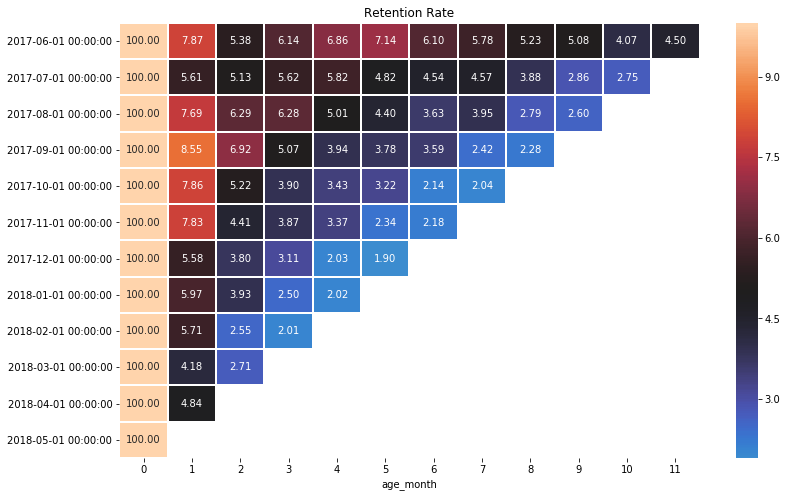

In [16]:
#определим Retention Rate пользователей по месяцам
retention = pd.DataFrame()
for col in cohorts.columns:
    retention = pd.concat([retention, (cohorts[col]/cohorts[0]*100)], axis=1)
retention.columns = cohorts.columns
#создадим тепловую карту Retention Rate по месяцам
plt.figure(figsize=(13,8))
plt.title('Retention Rate')
sns.heatmap(retention, annot=True, fmt='.2f', linewidth=1, vmax=10, center=5)

В последнее время (начиная с декабря) Retention Rate новых когорт в первый месяц стал ниже на два процента. Кроме того, неудачно стартовала, но выровнялась со временем июльская когорта. Ближе к концу отчетного периода RR практически всех когорт установился на одном и том же уровне(2-2,7%), что не лучшим образом говорит о качестве вновьприбывающих когорт: отток активных пользователей происходит в них намного быстрее.

Лучше всех ведет себя июньская когорта: ее RR убывает медленнее остальных (а с июля по октябрь даже рос) и к концу отчетного периода составляет 4,5%.

В результате расчетов мы выяснили, что 15% активных за неделю пользователей пользовались сервисом каждых день. Среди же числа активных в течение месяца показатель sticky factor равен всего 3% - это очень скромное значение.

### Выводы по продукту

По итогам построения и изучения отчетов по продукту мы выяснили, что  показатель количества уникальных пользователей в день (DAU) равен в среднем 907 человекам. График по дням данного показателя демонстрирует нам, что в начале отчетного периода DAU был меньше вышеназванного значения, однако в сентябре-октябре 2017-го года случился рост данного показателя, после чего он зафиксировался на этом уровне вплоть до конца марта 2018-го года. В период с марта 2018-го года и до конца отчетного периода мы видим снижение показателя DAU примерно в 1,5 раза. Возможно, такая динамика вызвана стабильностью работы сервиса, ведь в самом конце марта мы замечаем разовое аномальное падение показателя до нуля, что характерно в ситуации технических проблем.

Показатели количества уникальных пользователей в неделю (WAU) и месяц (MAU) равны в среднем 5716 и 23228 человекам соответственно.

Графики показателей WAU и MAU повторяют динамику DAU и без лишних шумов демонстрируют нам все тенденции роста и снижения пользовательсткой активности в рамках сервиса. Как итог, можно заметить, что по завершении отчетного периода число активных пользователей выросло, однако этот показатель мог быть и выше: такие показатели были достигнуты, но в последствии утеряны - в результате чего - необходимо выснить и провести работу над ошибками.

Далее в результате расчетов были вычислено, что среднее количество сессий в день равно 987, а на одного пользователя - 1.08.

На графике количества сессий в день так же, как и на графике DAU можно заметить рост в промежутке август-сентябрь 2017-го года, а затем график стабилизируется вплоть до конца марта 2018-го года, после которого идет снижение поазателя. Однако, проанализировав параллельно график числа ежедневных сессий одного пользователя, мы можем заметить, что за исключением известных нам выбросов показатель практически не изменился по прошествии отчетного периода, а значит, пользователи в среднем не стали пользоваться сервисом активнее. Скорее всего, изменения количества сессий в день связаны именно с притоком и оттоком пользователей, которые могли быть вызваны маркетингом, техническими/косметическими изменениями или изменениями в политике сервиса.

Далее в результате расчетов было вычислено, средняя продолжительность сессии (ASL) равна 60 секундам.

Взглянув на график показателя, можно заметить, что его рост наметился только после всплеска пользовательской активности в конце ноября 2017-го года, вызванного, скорее всего, маркетинговой рассылкой в преддверии Нового года. Затем, в последних числах марта, мы отмечаем единоразовое резкое падение продолжительности сессии - следствие вероятного технического сбоя. После этого и до конца отчетного периода средняя продолжительность сессии незначительно сокращается.

Наконец, мы выяснили, что в последнее время (начиная с декабря) Retention Rate новых когорт в первый месяц стал ниже на два процента. Кроме того, неудачно стартовала, но выровнялась со временем июльская когорта. Ближе к концу отчетного периода RR практически всех когорт установился на одном и том же уровне(2-2,7%), что не лучшим образом говорит о качестве вновьприбывающих когорт: отток активных пользователей происходит в них намного быстрее. Лучше всех ведет себя июньская когорта: ее RR убывает медленнее остальных (а с июля по октябрь даже рос) и к концу отчетного периода составляет 4,5%.

Как было замечено выше, маркетинг может положительно влиять на показатели пользовательской активности, что и было продемонстрировано на графиках выше. Однако, достигнутые результаты не были закреплены и итоговые значения показателей были снижены, вероятно в следствие того, что маркетиноговая активность была сокращена. А возможно, в результаты вмешалась и техническая сторона вопроса, а на активность пользователей оказали влияние качество и стабильность сервиса.

Необходимо провести работу по улучшению стабильности работы сервиса, а также изучить положительный опыт влияния маркетинговых активностей на активность пользователей.

### Отчеты по продажам 

#### Когда люди начинают покупать?

In [17]:
#получим таблицу с датами первых визитов
first_visits = (visits.sort_values(by = ['uid', 'start_ts']).groupby('uid', as_index=False)\
         .agg({'start_ts' : 'first', 'source_id': 'first', 'device': 'first'}))
first_visits = first_visits\
        .rename(columns={'start_ts':'first_visit', 'source_id':'first_source_id', 'device':'first_device'})
#проверка
display(first_visits.head())

,uid,first_visit,first_source_id,first_device
0,11863502262781,2018-03-01 17:27:00,3,touch
1,49537067089222,2018-02-06 15:55:00,2,touch
2,297729379853735,2017-06-07 18:47:00,3,desktop
3,313578113262317,2017-09-18 22:49:00,2,desktop
4,325320750514679,2017-09-30 14:29:00,5,desktop


In [18]:
#получим таблицу с датами первых покупок
first_orders = (orders.sort_values(by = ['uid', 'buy_ts']).groupby('uid', as_index=False)\
         .agg({'buy_ts' : 'first', 'revenue': 'first'}))
first_orders = first_orders\
        .rename(columns={'buy_ts':'first_buy', 'revenue':'first_buy_revenue'})
#проверка
display(first_orders.head())

,uid,first_buy,first_buy_revenue
0,313578113262317,2018-01-03 21:51:00,0.55
1,1575281904278712,2017-06-03 10:13:00,1.22
2,2429014661409475,2017-10-11 18:33:00,73.33
3,2464366381792757,2018-01-28 15:54:00,2.44
4,2551852515556206,2017-11-24 10:14:00,6.32


In [19]:
#объединим таблицы
conversion = pd.merge(first_visits, first_orders, on='uid')
#проверка
conversion.head()

,uid,first_visit,first_source_id,first_device,first_buy,first_buy_revenue
0,313578113262317,2017-09-18 22:49:00,2,desktop,2018-01-03 21:51:00,0.55
1,1575281904278712,2017-06-03 10:13:00,10,touch,2017-06-03 10:13:00,1.22
2,2429014661409475,2017-10-11 17:14:00,3,desktop,2017-10-11 18:33:00,73.33
3,2464366381792757,2018-01-27 20:10:00,5,desktop,2018-01-28 15:54:00,2.44
4,2551852515556206,2017-11-24 10:14:00,5,desktop,2017-11-24 10:14:00,6.32


In [20]:
#рассчитаем время до первой покупки
conversion['minutes_to_purchase'] = ((conversion['first_buy'] - conversion['first_visit']) / np.timedelta64(1,'m'))\
        .round().astype('int')
#проверка
conversion.head()

,uid,first_visit,first_source_id,first_device,first_buy,first_buy_revenue,minutes_to_purchase
0,313578113262317,2017-09-18 22:49:00,2,desktop,2018-01-03 21:51:00,0.55,154022
1,1575281904278712,2017-06-03 10:13:00,10,touch,2017-06-03 10:13:00,1.22,0
2,2429014661409475,2017-10-11 17:14:00,3,desktop,2017-10-11 18:33:00,73.33,79
3,2464366381792757,2018-01-27 20:10:00,5,desktop,2018-01-28 15:54:00,2.44,1184
4,2551852515556206,2017-11-24 10:14:00,5,desktop,2017-11-24 10:14:00,6.32,0


Text(0.5, 1.0, 'Время, прошедшее от первой сессии до первой покупки, мин.')

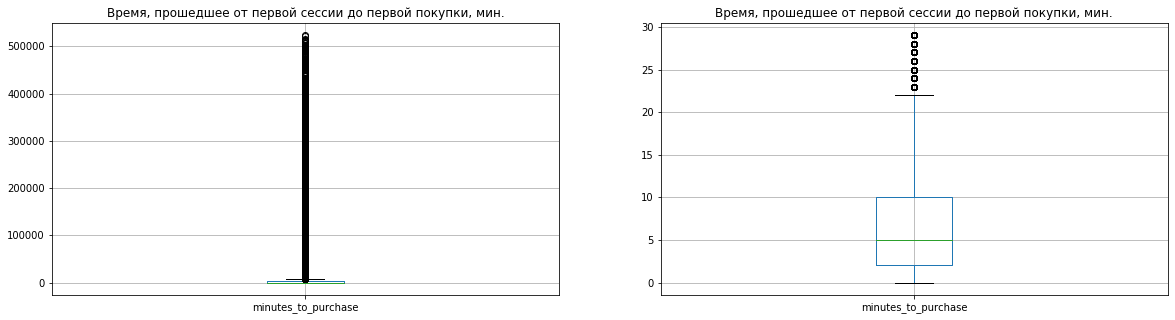

In [21]:
#построим график
plt.subplots(figsize=(20,5))
conversion.boxplot(column='minutes_to_purchase', ax = plt.subplot(121))\
        .set_title('Время, прошедшее от первой сессии до первой покупки, мин.')
conversion.query('minutes_to_purchase < 30').boxplot(column='minutes_to_purchase', ax = plt.subplot(122))\
        .set_title('Время, прошедшее от первой сессии до первой покупки, мин.')

Рассчитав время, прошедшее от первой сессии до первой покупки пользователей, и построив диаграммы распределения данного параметра, мы выяснили, что для половины пользователей достаточно 5 минут, чтобы совершить покупку. И лишь 25% пользователей не хватит 10 минут для совершения покупки. Выбросы равномерно распределены в направлении роста показателя вплоть до 500000+ минут (более года): это пользователи, прошедшие регистрацию, но не совершившие покупку в эту же сессию, а воспользовавшиеся сервисом лишь спустя значительное время.

#### Сколько раз покупают за период?

In [22]:
#определяем время жизни пользователя в месяцах к моменту покупки
purchases = pd.merge(first_visits, orders, on='uid')
purchases['purchase_month'] = purchases['buy_ts'].astype('datetime64[M]')
purchases['first_session_month'] = purchases['first_visit'].astype('datetime64[M]')
purchases['age_month'] =  ((purchases['purchase_month'] - purchases['first_session_month']) / np.timedelta64(1,'M'))\
        .round().astype('int')
#рассчитаем доход с пользователя
purchases_grouped_by_cohorts = purchases.groupby(['first_session_month','age_month']).agg({'revenue':'count','uid':'nunique'})
purchases_grouped_by_cohorts['revenue_per_user'] = purchases_grouped_by_cohorts['revenue'] / purchases_grouped_by_cohorts['uid']
#формируем когорты пользователей по месяцам
cohorts = purchases_grouped_by_cohorts\
        .pivot_table(index='first_session_month', columns='age_month', values='revenue_per_user', aggfunc='mean')

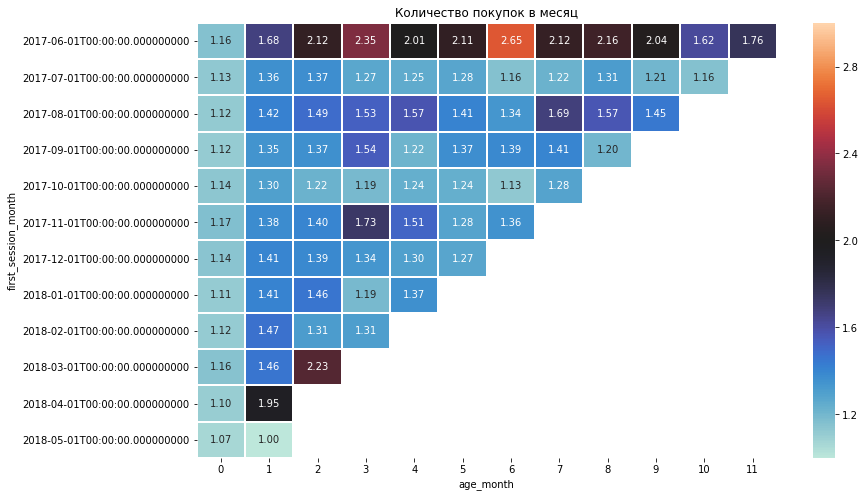

In [23]:
#создадим тепловую карту числа покупок в месяц по месяцам
plt.figure(figsize=(13,8))
plt.title('Количество покупок в месяц')
sns.heatmap(cohorts, annot=True, fmt='.2f', linewidth=1, vmax=3, center=2)

Создав тепловую карту числа покупок в месяц по когортам, мы можем сказать, что все когорты в первый месяц жизни совершают примерно одно и то же количество покупок (от 1,1 до 1,17 на одного пользователя). Негативно отличается только майская когорта, и то, незначительно - 1,07 покупок на пользователя. Нужно отметить, что у всех когорт во второй месяц жизни происходит существенный прирост среднего числа покупок, что положительно говорит об удовлетворенности пользователей, однако дальнейшего роста подобного темпа не происходит, и показатель стабилизируется.

Проанализировав покупательский спрос когорт на протяжении жизни, мы заметили, что самой покупающей является июньская когорта: в 2/3 месяцев ее пользователи делали в среднем более двух покупок в месяц, а в декабре - 2,65 покупок. Кроме того, можно заметить, что ежемесячный прирост числа покупок в месяц у "молодых" когорт - мартовской и апрельской - существенно выше динамики предыдущих. Вероятно, это связано с тем, что пользователи этих когорт более "качественные", готовые к покупкам, а значит, в последние месяцы в сервис пришли правильные лиды.

#### Какой средний чек?

In [24]:
#рассчитаем доход с пользователя
purchases_grouped_by_cohorts = purchases.groupby(['first_session_month','age_month']).agg({'revenue':'sum','uid':'nunique'})
purchases_grouped_by_cohorts['revenue_per_user'] = purchases_grouped_by_cohorts['revenue'] / purchases_grouped_by_cohorts['uid']
#формируем когорты пользователей по месяцам
cohorts = purchases_grouped_by_cohorts\
        .pivot_table(index='first_session_month', columns='age_month', values='revenue_per_user', aggfunc='mean')

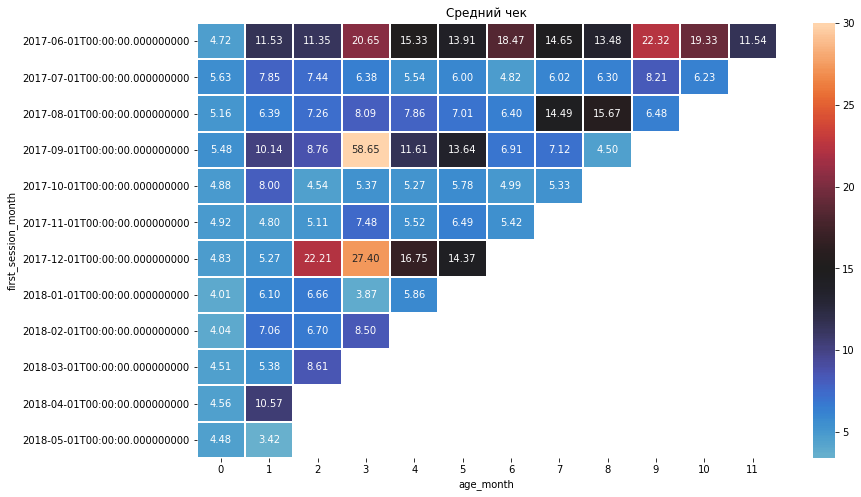

In [25]:
#создадим тепловую карту среднего чека по месяцам
plt.figure(figsize=(13,8))
plt.title('Средний чек')
sns.heatmap(cohorts, annot=True, fmt='.2f', linewidth=1, vmax=30, center=15)

Построив тепловую карту среднего чека по когортам, мы можем сказать, что во второй месяц отчетного периода в сервис пришли пользователи, с существенно бОльшим средним чеком, нежели в первый. Далее же этот показатель снижался из месяца в месяц, и лишь у мартовской когорты динамика изменений сменилась на противоположную. Хуже всего себя показали январская и февральская когорты, что вероятно является следствием того, что пользователи потратили много денег под Новый год.

Как и в случае количества покупок, от прочих когорт существенно отличается июньская: увеличившись во втором месяце в 2,5 раза, средний чек этой когорты на протяжении всей жизни когорты держится существенно выше прочих. Интересный всплеск показателя можно заметить у декабрьской когорты в феврале; по прошествии четырех месяцев средний чек упал, но все равно остался выше начального в три раза. Существенный прирост показателя во второй месяц жизни наблюдается также у апрельской когорты.

На графике также можно заметить разовые крупные покупки: март-апрель у августовской когорты и декабрь-февраль у сентябрьской.

#### Сколько денег приносят? (LTV)

In [26]:
#сформируем когорты
cohort_sizes = purchases.groupby('first_session_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_session_month', 'n_buyers']
cohorts = purchases.groupby(['first_session_month','age_month']).agg({'revenue': 'sum'}).reset_index()
#объединим таблицы
report = pd.merge(cohort_sizes, cohorts, on='first_session_month')
#рассчитаем LTV
report['ltv'] = report['revenue'] / report['n_buyers']
report['first_session_month'] = report['first_session_month'].dt.strftime('%Y-%m')
#построим таблицу
output = report.pivot_table(
        index='first_session_month', 
        columns='age_month', 
        values='ltv', 
        aggfunc='mean')
output = output.cumsum(axis=1)

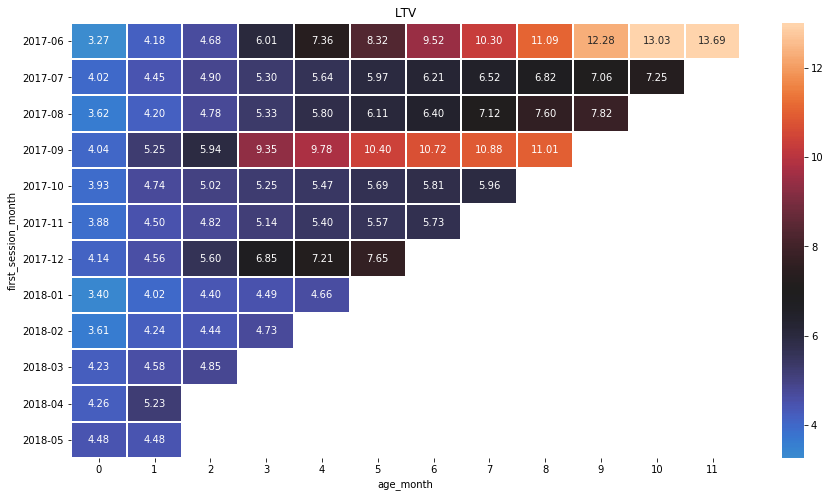

In [27]:
#создадим тепловую карту
plt.figure(figsize=(15,8))
plt.title('LTV')
sns.heatmap(output, annot=True, fmt='.2f', linewidth=1, vmax=13, center=7)

По показателю LTV значительно выделяются три когорты: июньская, сентябрьская и декабрьская. По прошествии года жизни LTV пользователя июньской коготры равен 13,69. У пользователей сентябрьской есть все предпосылки повторить этот результат, так как динамика LTV в когорте повторяет июньскую. Столь большое отличие показателя LTV данных когорт от прочих является следствием, в превую очередь, высоких показателей среднего чека: именно у этих когорт они ранее были отмечены. Пользователи же июньской когорты, помимо прочего, еще и покупают чаще других.

In [28]:
#сформируем когорты
cohort_sizes = purchases.groupby('first_session_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_session_month', 'n_buyers']
cohorts = purchases.groupby(['first_session_month','age_month', 'first_device']).agg({'revenue': 'sum'}).reset_index()
#объединим таблицы
report = pd.merge(cohort_sizes, cohorts, on='first_session_month')
#рассчитаем LTV
report['ltv'] = report['revenue'] / report['n_buyers']
report['first_session_month'] = report['first_session_month'].dt.strftime('%Y-%m')
#построим таблицу
output = report.pivot_table(
        index=['first_session_month','first_device'], 
        columns='age_month', 
        values='ltv', 
        aggfunc='mean')
output = output.cumsum(axis=1)

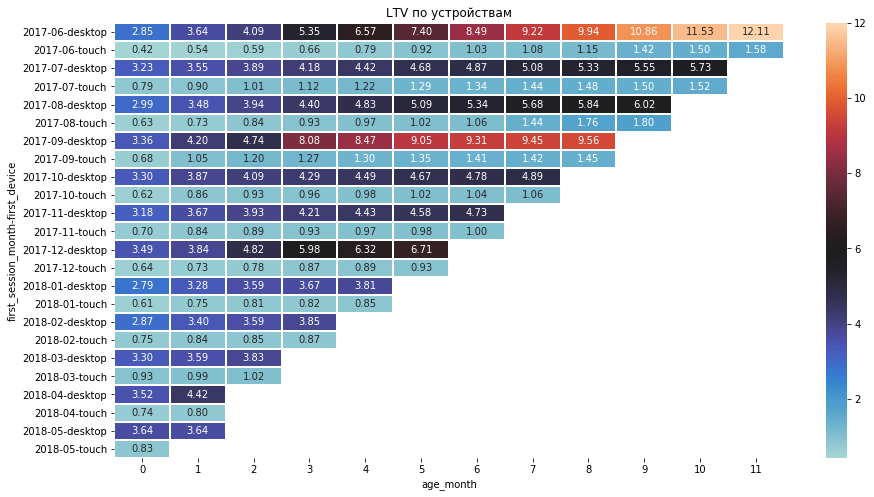

In [29]:
#создадим тепловую карту
plt.figure(figsize=(15,8))
plt.title('LTV по устройствам')
sns.heatmap(output, annot=True, fmt='.2f', linewidth=1, vmax=12, center=6)

Построив тепловую карту и изучив показатель LTV в разрезе различных устройств, можем сказать, что для всех когорт наблюдается превалирование домашних устройств над мобильными в 4-5 раз.

In [30]:
##сформируем когорты
cohort_sizes = purchases.groupby('first_session_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_session_month', 'n_buyers']
cohorts = purchases.groupby(['first_session_month','age_month', 'first_source_id']).agg({'revenue': 'sum'}).reset_index()
#объединим таблицы
report = pd.merge(cohort_sizes, cohorts, on='first_session_month')
#рассчитаем LTV
report['ltv'] = report['revenue'] / report['n_buyers']
report['first_session_month'] = report['first_session_month'].dt.strftime('%Y-%m')
#построим таблицу
output = report.pivot_table(
        index=['first_session_month','first_source_id'], 
        columns='age_month', 
        values='ltv', 
        aggfunc='mean')
output = output.cumsum(axis=1)

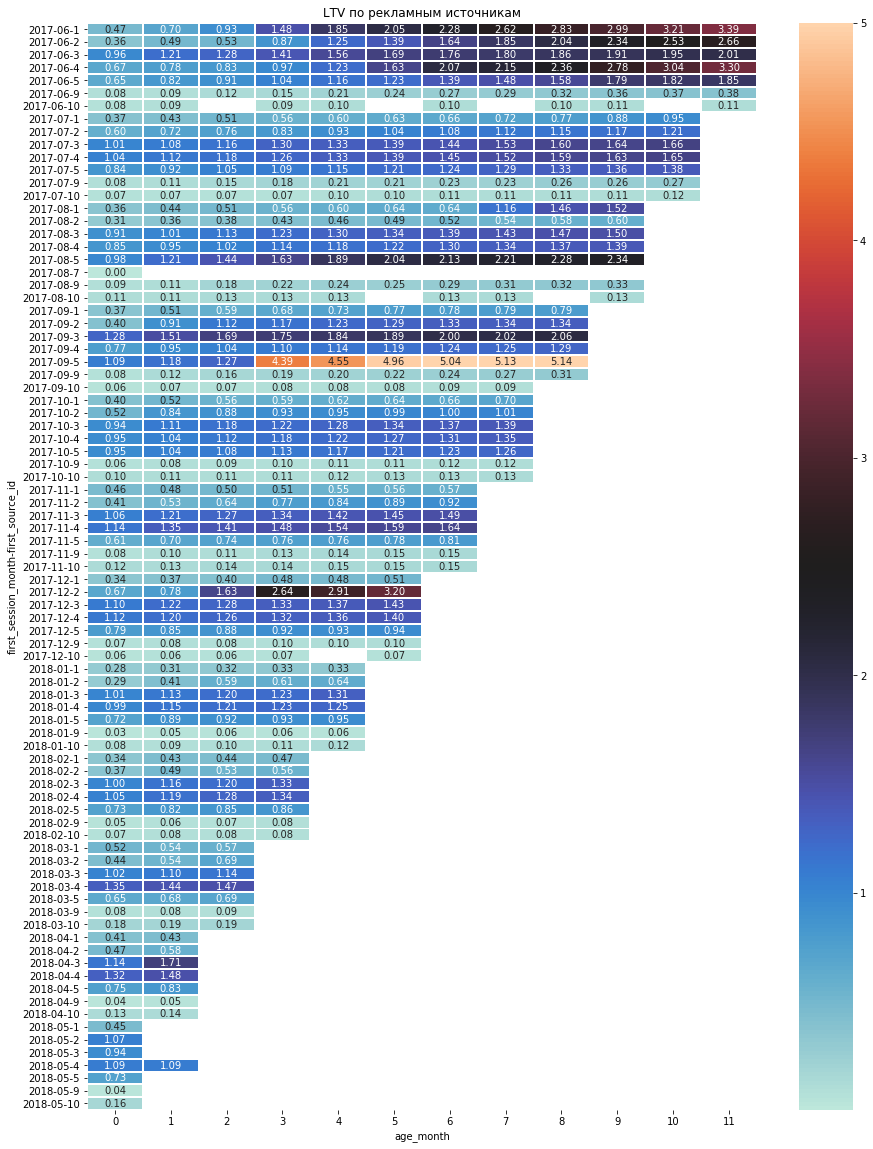

In [31]:
#создадим тепловую карту
plt.figure(figsize=(15,20))
plt.title('LTV по рекламным источникам')
sns.heatmap(output, annot=True, fmt='.2f', linewidth=1, vmax=5, center=2.5)

Построив тепловую карту и изучив показатель LTV в разрезе различных рекламных источников, можем сказать, что самыми слабыми являются источники 9 и 10: их LTV растет меньше всего. За редким исключением самыми полезными являются источники 3, 4 и 5.

### Выводы по продажам

Построив и изучив отчеты по продажам, мы выяснили, что для половины пользователей достаточно 5 минут, чтобы совершить покупку. И лишь 25% пользователей не хватит 10 минут для совершения покупки. Выбросы равномерно распределены в направлении роста показателя вплоть до 500000+ минут (более года): это пользователи, прошедшие регистрацию, но не совершившие покупку в эту же сессию, а воспользовавшиеся сервисом лишь спустя значительное время.

Создав тепловую карту числа покупок в месяц по когортам, мы можем сказать, что все когорты в первый месяц жизни совершают примерно одно и то же количество покупок (от 1,1 до 1,17 на одного пользователя). Нужно отметить, что у всех когорт во второй месяц жизни происходит существенный прирост среднего числа покупок, что положительно говорит об удовлетворенности пользователей, однако дальнейшего роста подобного темпа не происходит, и показатель стабилизируется.

Проанализировав покупательский спрос когорт на протяжении жизни, мы заметили, что самой покупающей является июньская когорта: в 2/3 месяцев ее пользователи делали в среднем более двух покупок в месяц, а в декабре - 2,65 покупок. Кроме того, можно заметить, что ежемесячный прирост числа покупок в месяц у "молодых" когорт - мартовской и апрельской - существенно выше динамики предыдущих. Вероятно, это связано с тем, что пользователи этих когорт более "качественные", готовые к покупкам, а значит, в последние месяцы в сервис пришли правильные лиды.

Построив тепловую карту среднего чека по когортам, мы можем сказать, что во второй месяц отчетного периода в сервис пришли пользователи, с существенно бОльшим средним чеком, нежели в первый. Далее же этот показатель снижался из месяца в месяц, и лишь у мартовской когорты динамика изменений сменилась на противоположную. Хуже всего себя показали январская и февральская когорты, что вероятно является следствием того, что пользователи потратили много денег под Новый год.

Как и в случае количества покупок, от прочих когорт существенно отличается июньская: увеличившись во втором месяце в 2,5 раза, средний чек этой когорты на протяжении всей жизни когорты держится существенно выше прочих. Интересный всплеск показателя можно заметить у декабрьской когорты в феврале; по прошествии четырех месяцев средний чек упал, но все равно остался выше начального в три раза. Существенный прирост показателя во второй месяц жизни наблюдается также у апрельской когорты.

По показателю LTV значительно выделяются три когорты: июньская, сентябрьская и декабрьская. По прошествии года жизни LTV пользователя июньской коготры равен 13,69. У пользователей сентябрьской есть все предпосылки повторить этот результат, так как динамика LTV в когорте повторяет июньскую. Столь большое отличие показателя LTV данных когорт от прочих является следствием, в превую очередь, высоких показателей среднего чека: именно у этих когорт они ранее были отмечены. Пользователи же июньской когорты, помимо прочего, еще и покупают чаще других. Изучив показатель LTV в разрезе различных устройств, можем сказать, что для всех когорт наблюдается превалирование домашних устройств над мобильными в 4-5 раз, а в разрезе различных рекламных источников -  что самыми слабыми являются источники 9 и 10: их LTV растет меньше всего. За редким исключением самыми полезными являются источники 3, 4 и 5.

### Маркетинговые метрики

#### Сколько денег потратили? Всего / на каждый источник / по времени

Рекламный бюджет равен 329131.62


,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

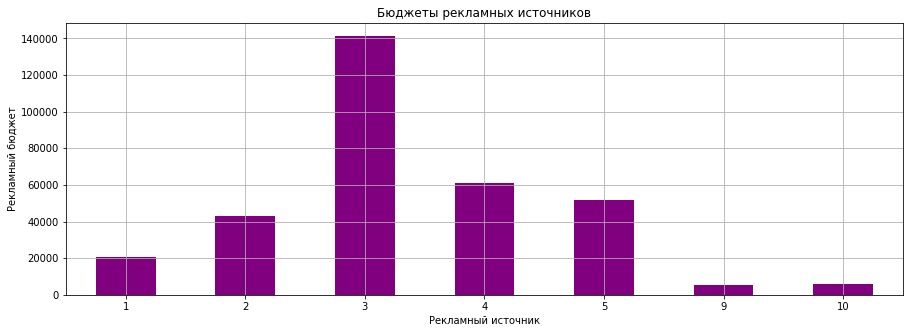

In [32]:
#сгруппируем рекламные расходы по источникам
print('Рекламный бюджет равен {}'.format(costs['costs'].sum()))
display(costs.groupby('source_id', as_index=False)['costs'].sum())
#построим диаграмму
costs_hist = costs.groupby('source_id', as_index=False)['costs'].sum()
costs_hist = costs_hist.set_index('source_id')
plt.subplots(figsize=(15,5))
costs_hist['costs'].plot(kind='bar', grid=True, color='purple')
plt.title('Бюджеты рекламных источников')
plt.ylabel('Рекламный бюджет')
plt.xlabel('Рекламный источник')
plt.xticks(rotation=0)

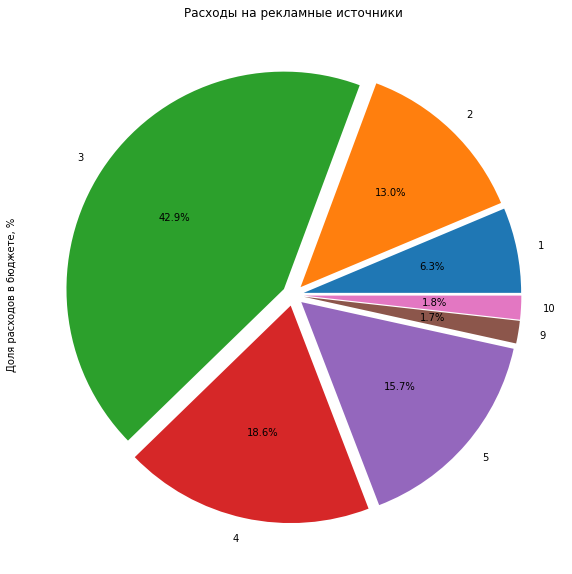

In [33]:
#построим круговую диаграмму
costs_by_sources = costs.groupby('source_id', as_index=False)['costs'].sum()
plt.subplots(figsize=(15,10))
explode = [0.05 for i in range(len(costs_by_sources['source_id']))]
plt.pie(costs_by_sources['costs'], autopct = '%.1f%%', labels = costs_by_sources['source_id'], explode=explode)
plt.title('Расходы на рекламные источники')
plt.ylabel('Доля расходов в бюджете, %')
plt.show()

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Text(0, 0.5, 'Сумма расходов')

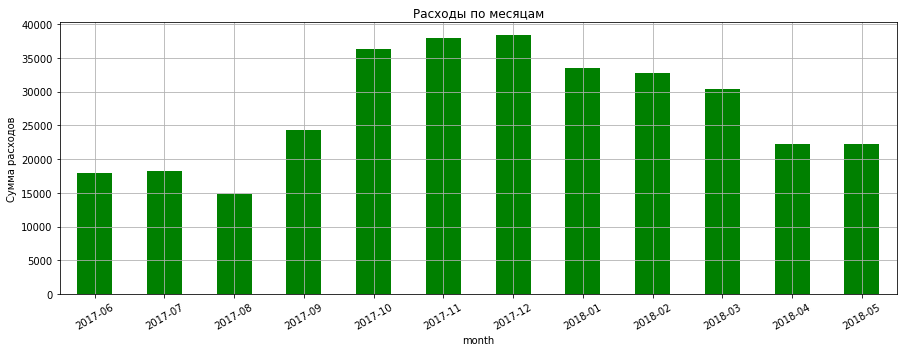

In [34]:
#сгруппируем рекламные расходы по месяцам
costs['month'] = costs['dt'].astype('datetime64[M]')
costs_by_months = costs.groupby('month', as_index=False)['costs'].sum()
display(costs_by_months)
#построим диаграмму
costs_by_months['month'] = costs_by_months['month'].dt.strftime('%Y-%m')
costs_by_months = costs_by_months.set_index('month')
plt.subplots(figsize=(15,5))
costs_by_months['costs'].plot(kind='bar', grid=True, color='green')
plt.xticks(rotation=30, fontsize = 10)
plt.title('Расходы по месяцам')
plt.ylabel('Сумма расходов')

Объем рекланых инвестиций за 12 месяцев составил 329131.62. Из этой суммы 42,9% было потрачено на источник 3, 18,6% - на источник 4, 15,7% - на источник 5, 136% - на источник 2, 6,3% - на источник 1, а на 9 и 10 - менее, чем по 2%.

Пики рекламных расходов по месяцам приходятся на октябрь-декабрь: очевидно, влияние приближающегося Нового года. Также высоки, но находятся в отрицательной динамике расходы в январе-марте: вероятно, из-за гендерных праздников.

### Сколько стоило привлечение одного покупателя из каждого источника?

In [35]:
#рассчитаем САС по рекламным каналам
total_costs = costs.groupby('source_id', as_index=False).agg({'costs':'sum'})
total_purchases = purchases.groupby('first_source_id', as_index=False).agg({'uid':'nunique'})
total_purchases = total_purchases.rename(columns={'first_source_id':'source_id', 'uid':'n_buyers'})
cac_per_source = pd.merge(total_costs, total_purchases, on='source_id')
cac_per_source['CAC'] = cac_per_source['costs'] / cac_per_source['n_buyers']
#проверка
display(cac_per_source)

,source_id,costs,n_buyers,CAC
0,1,20833.27,2899,7.19
1,2,42806.04,3506,12.21
2,3,141321.63,10473,13.49
3,4,61073.60,10296,5.93
4,5,51757.10,6931,7.47
5,9,5517.49,1088,5.07
6,10,5822.49,1329,4.38


Text(0, 0.5, 'Стоимость привлечения покупателей (САС)')

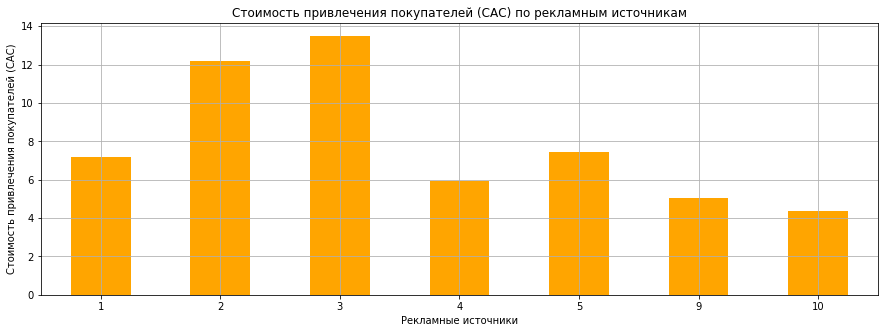

In [36]:
#построим диаграмму
cac_per_source = cac_per_source.set_index('source_id')
plt.figure(figsize=(15,5))
cac_per_source['CAC'].plot(kind='bar', grid=True, color='orange')
plt.title('Стоимость привлечения покупателей (САС) по рекламным источникам')
plt.xlabel('Рекламные источники')
plt.xticks(rotation=0)
plt.ylabel('Стоимость привлечения покупателей (САС)')

Рассчитав и изучив стоимость привлечения покупателей (САС) по рекламным источникам, можем сказать, что самыми дорогими являются источники 2 и 3 (в 2-3 дороже остальных): 12,21 и 13,49 соответственно, а самыми дешевыми - 9 и 10: 5,07 и 4,38 соответственно.

#### На сколько окупились расходы? (ROMI)

#### ROMI по устройствам

In [37]:
#подготовим таблицу
device_purchases = purchases.groupby(['first_source_id','first_device'], as_index=False).agg({'uid':'nunique'})
device_purchases = device_purchases.rename(columns={'first_source_id':'source_id', 'uid':'n_buyers'})
cac_per_device = pd.merge(device_purchases, total_costs, on='source_id')
#напишем функцию для расчета расходов по устройствам
def costs_per_device(row):
    source = row['source_id']
    result = row['n_buyers'] * cac_per_source.query('source_id == @source')['CAC'][source]
    return(result)
#применим функцию
cac_per_device['costs_per_device'] = cac_per_device.apply(costs_per_device, axis=1)

#рассчитаем САС по устройствам 
cac_per_device_grouped = cac_per_device.groupby('first_device', as_index=False).agg({'n_buyers':'sum','costs_per_device':'sum'})
cac_per_device_grouped['cac_per_device'] = cac_per_device_grouped['costs_per_device'] / cac_per_device_grouped['n_buyers']
#проверка
display(cac_per_device_grouped)

,first_device,n_buyers,costs_per_device,cac_per_device
0,desktop,29210,265083.59,9.08
1,touch,7312,64048.03,8.76


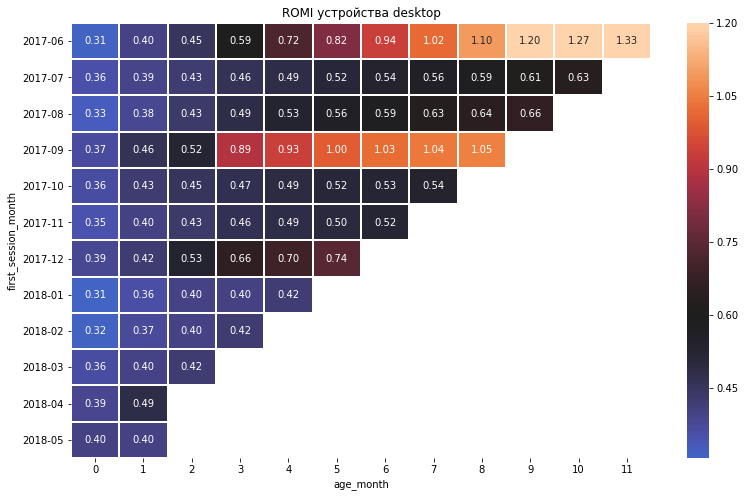

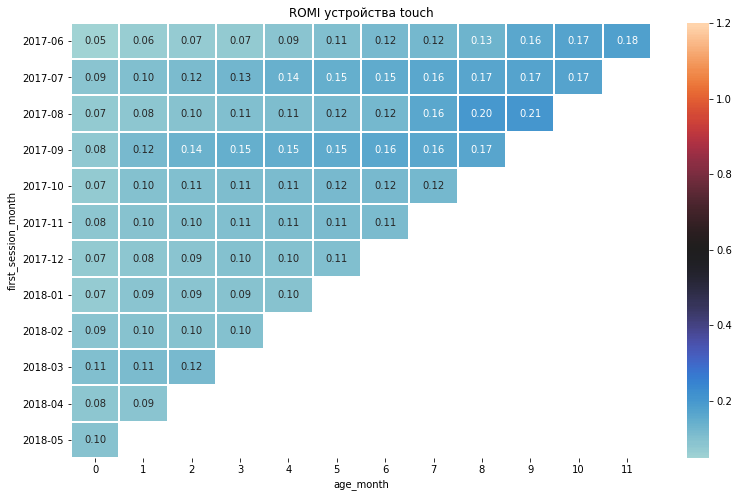

In [38]:
#напишем функцию для создания тепловой карты ROMI по рекламным источникам
device_list = cac_per_device_grouped['first_device'].unique()
i = 0
for device in device_list:
    cohort_sizes = purchases.groupby('first_session_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes.columns = ['first_session_month', 'n_buyers']
    cohorts = purchases.query('first_device == @device')\
                    .groupby(['first_session_month','age_month']).agg({'revenue': 'sum'}).reset_index()
#объединим таблицы
    report = pd.merge(cohort_sizes, cohorts, on='first_session_month')
#рассчитаем ROMI
    report['ltv'] = report['revenue'] / report['n_buyers']
    report['romi'] =  report['ltv'] / cac_per_device_grouped.query('first_device == @device')['cac_per_device'][i]
    report['first_session_month'] = report['first_session_month'].dt.strftime('%Y-%m')
    output = report.pivot_table(
            index=['first_session_month'], 
            columns='age_month', 
            values='romi', 
            aggfunc='mean')
    output = output.cumsum(axis=1)
    i += 1
#создадим тепловую карту
    plt.figure(figsize=(13,8))
    plt.title('ROMI устройства {}'.format(device))
    sns.heatmap(output, annot=True, fmt='.2f', linewidth=1, vmax=1.2, center=0.6)

Построив тепловую карту и изучив показатель ROMI в разрезе различных устройств, можно сказать, что окупились, лишь пользователи июньской и сентябрьской когорт, пришедшие с домашних устройств. При этом можно сказать, что все когорты стартуют примерно в одинаковых условиях: окупают свое привлечение в первый месяц на 31-40%.

С мобильными устройствами все значительно хуже: налицо очень низкий темп роста ROMI по всем когортам.

#### ROMI по рекламным источникам

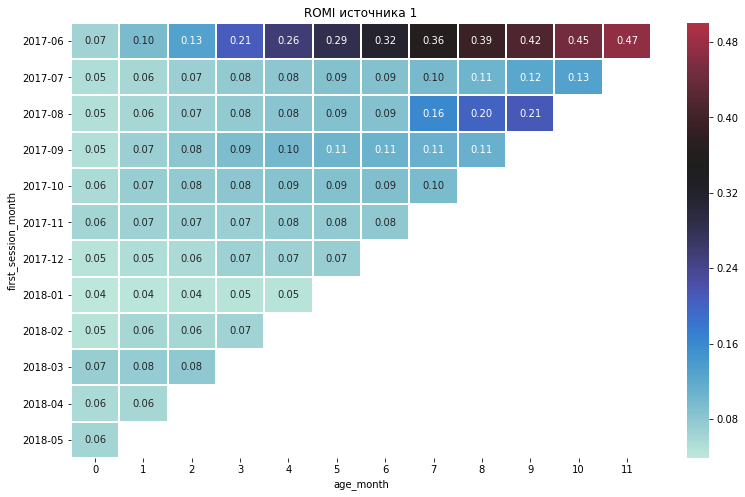

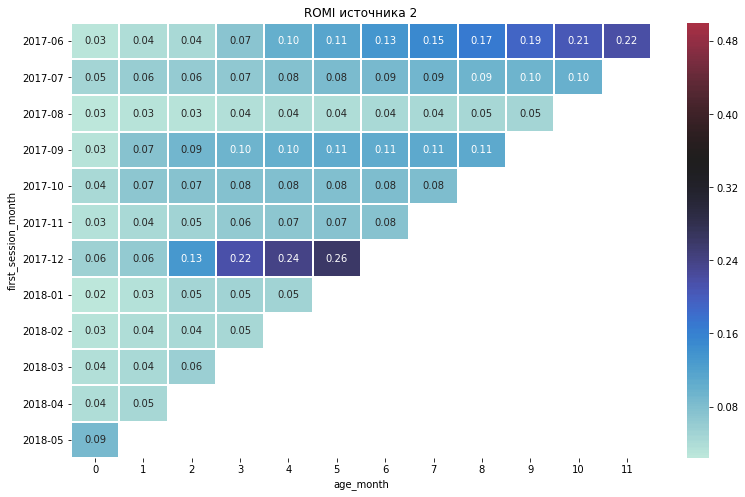

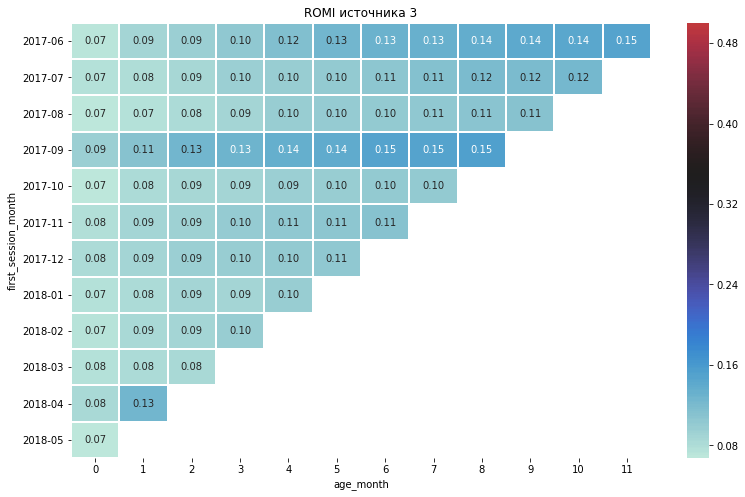

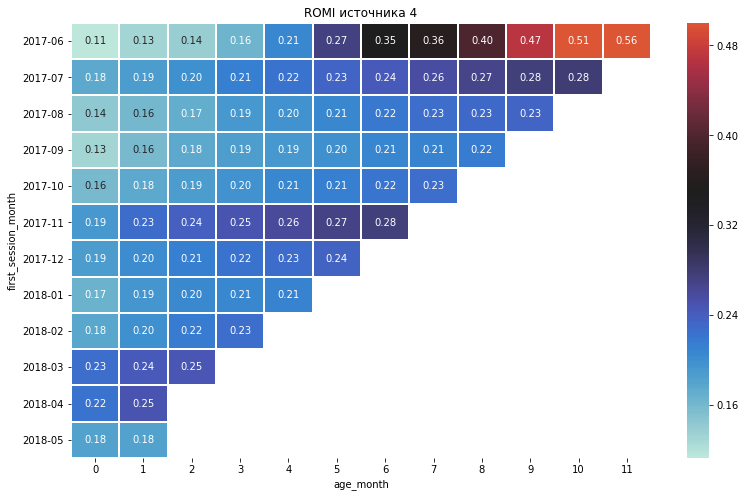

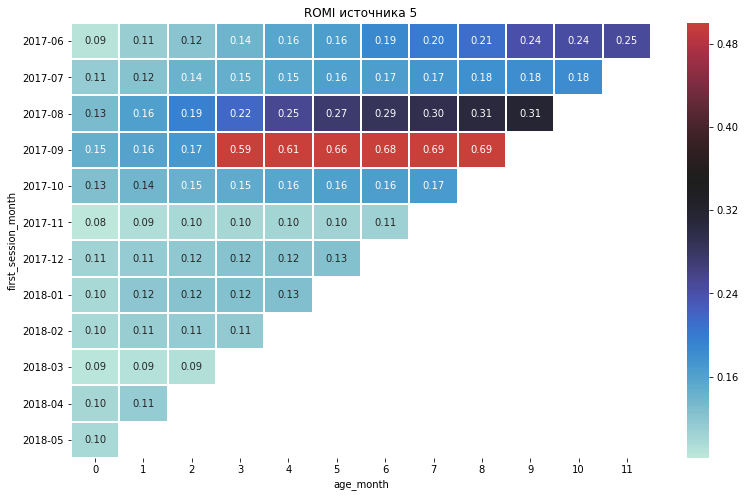

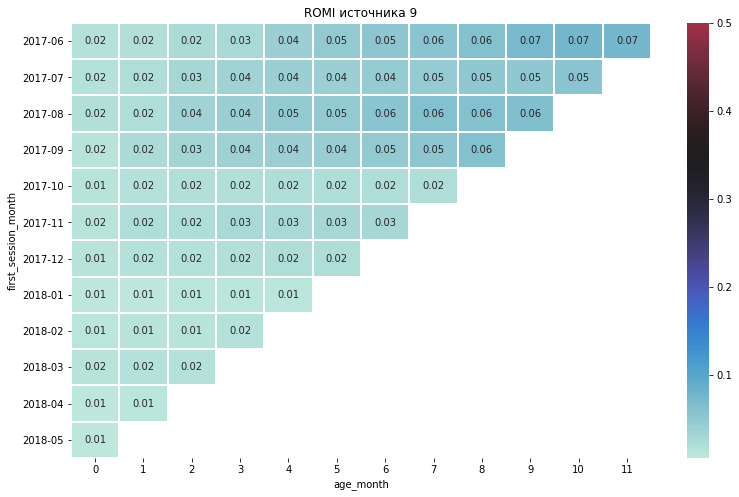

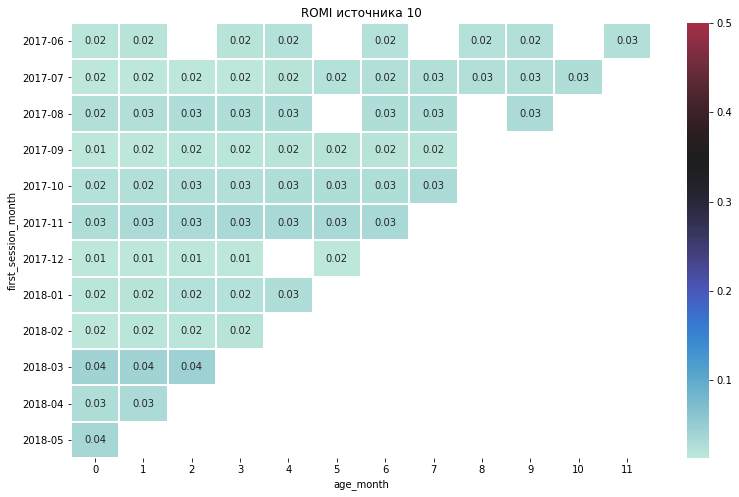

In [39]:
#напишем функцию для создания тепловой карты ROMI по устройствам
source_list = purchases.query('first_source_id != 7')['first_source_id'].sort_values().unique()
for source_number in source_list:
    cohort_sizes = purchases.groupby('first_session_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes.columns = ['first_session_month', 'n_buyers']
    cohorts = purchases.query('first_source_id == @source_number')\
                    .groupby(['first_session_month','age_month']).agg({'revenue': 'sum'}).reset_index()
#объединим таблицы
    report = pd.merge(cohort_sizes, cohorts, on='first_session_month')
#рассчитаем ROMI
    report['ltv'] = report['revenue'] / report['n_buyers']
    report['romi'] =  report['ltv'] / cac_per_source.query('source_id == @source_number')['CAC'][source_number]
    report['first_session_month'] = report['first_session_month'].dt.strftime('%Y-%m')
    output = report.pivot_table(
            index=['first_session_month'], 
            columns='age_month', 
            values='romi', 
            aggfunc='mean')
    output = output.cumsum(axis=1)
#создадим тепловую карту
    plt.figure(figsize=(13,8))
    plt.title('ROMI источника {}'.format(source_number))
    sns.heatmap(output, annot=True, fmt='.2f', linewidth=1, vmax=0.5, center=0.35)

Построив тепловую карту и изучив показатель ROMI в разрезе различных рекламных источников, можно сказать, что в отдельности ни один из источников не окупился, есть лишь отдельные когорты, которые демонстрируют более позитивные показатели: по источнику 1 это июньская когорта (окупилась на 47%), по источнику 4 - также июньская когорта (окупилась на 56%), а по источнику 5 - сентябрьская (окупилась на 69%).

В самых слабых источниках - 9 и 10 - когорты окуиплись не более, чем на 7%.

### Выводы по маркетингу

Объем рекланых инвестиций за 12 месяцев составил 329131.62. Из этой суммы 42,9% было потрачено на источник 3, 18,6% - на источник 4, 15,7% - на источник 5, 136% - на источник 2, 6,3% - на источник 1, а на 9 и 10 - менее, чем по 2%. Пики рекламных расходов по месяцам приходятся на октябрь-декабрь: очевидно, влияние приближающегося Нового года. Также высоки, но находятся в отрицательной динамике расходы в январе-марте: вероятно, из-за гендерных праздников.

Рассчитав и изучив стоимость привлечения покупателей (САС) по рекламным источникам, можем сказать, что самыми дорогими являются источники 2 и 3 (в 2-3 дороже остальных): 12,21 и 13,49 соответственно, а самыми дешевыми - 9 и 10: 5,07 и 4,38 соответственно.

Построив тепловую карту и изучив показатель ROMI в разрезе различных устройств, можно сказать, что окупились, лишь пользователи июньской и сентябрьской когорт, пришедшие с домашних устройств. При этом можно сказать, что все когорты стартуют примерно в одинаковых условиях: окупают свое привлечение в первый месяц на 31-40%. С мобильными устройствами все значительно хуже: налицо очень низкий темп роста ROMI по всем когортам.

Построив тепловую карту и изучив показатель ROMI в разрезе различных рекламных источников, можно сказать, что в отдельности ни один из источников не окупился, есть лишь отдельные когорты, которые демонстрируют более позитивные показатели: по источнику 1 это июньская когорта (окупилась на 47%), по источнику 4 - также июньская когорта (окупилась на 56%), а по источнику 5 - сентябрьская (окупилась на 69%). В самых слабых источниках - 9 и 10 - когорты окуиплись не более, чем на 7%.

## Выводы по проекту

В ходе работы над проектом мы выяснили, что показатель количества уникальных пользователей в день (DAU) сервиса Яндекс.Афиша равен в среднем 907 человекам, а показатели в неделю (WAU) и месяц (MAU) - в среднем 5716 и 23228 человекам соответственно. График по дням демонстрирует нам, что в начале отчетного периода показатели были меньше вышеназванного значения, однако в сентябре-октябре 2017-го года случился рост, после чего они зафиксировались примерно на одном уровне вплоть до конца марта 2018-го года. В период с марта 2018-го года и до конца отчетного периода мы видим снижение показателей примерно в 1,5 раза. Возможно, такая динамика вызвана стабильностью работы сервиса, ведь в самом конце марта мы замечаем разовое аномальное падение показателя до нуля, что характерно в ситуации технических проблем. Как итог, можно заметить, что по завершении отчетного периода число активных пользователей выросло, однако этот показатель мог быть и выше: такие показатели были достигнуты в октябре-марте, но в последствии утеряны - в результате чего - необходимо выснить и провести работу над ошибками.

Далее в результате расчетов было вычислено, что среднее количество сессий в день равно 987, а на одного пользователя - 1.08.
На графике количества сессий в день можно заметить рост в промежутке август-сентябрь 2017-го года, а затем график стабилизируется вплоть до конца марта 2018-го года, после которого идет снижение показателя. Однако, проанализировав параллельно график числа ежедневных сессий одного пользователя, мы можем заметить, что за исключением известных нам выбросов показатель практически не изменился по прошествии отчетного периода, а значит, пользователи в среднем не стали пользоваться сервисом активнее. Скорее всего, изменения количества сессий в день связаны именно с притоком и оттоком пользователей, которые могли быть вызваны маркетингом, техническими/косметическими изменениями или изменениями в политике сервиса.

Затем в результате расчетов было вычислено, средняя продолжительность сессии (ASL) равна 60 секундам. Взглянув на график показателя, можно заметить, что его рост наметился только после всплеска пользовательской активности в конце ноября 2017-го года, вызванного, скорее всего, маркетинговой рассылкой в преддверии Нового года. Затем, в последних числах марта, мы отмечаем единоразовое резкое падение продолжительности сессии - следствие вероятного технического сбоя. После этого и до конца отчетного периода средняя продолжительность сессии незначительно сокращается.

После этого мы выяснили, что в последнее время (начиная с декабря) Retention Rate новых когорт в первый месяц стал ниже на два процента. Кроме того, неудачно стартовала, но выровнялась со временем июльская когорта. Ближе к концу отчетного периода RR практически всех когорт установился на одном и том же уровне(2-2,7%), что не лучшим образом говорит о качестве вновьприбывающих когорт: отток активных пользователей происходит в них намного быстрее. Лучше всех вела себя июньская когорта: ее RR убывал медленнее остальных (а с июля по октябрь даже рос) и к концу отчетного периода составляет 4,5%.

Как было замечено выше, маркетинг может положительно влиять на показатели пользовательской активности, что и было продемонстрировано на графиках выше. Однако, достигнутые результаты не были закреплены и итоговые значения показателей были снижены, вероятно в следствие того, что маркетиноговая активность была сокращена. А возможно, в результаты вмешалась и техническая сторона вопроса, а на активность пользователей оказали влияние качество и стабильность сервиса. Рекомендуется провести работу по улучшению стабильности работы сервиса, а также изучить положительный опыт влияния маркетинговых активностей на активность пользователей.

Построив и изучив отчеты по продажам, мы выяснили, что для половины пользователей достаточно 5 минут, чтобы совершить покупку. И лишь 25% пользователей не хватит 10 минут для совершения покупки. Выбросы равномерно распределены в направлении роста показателя вплоть до 500000+ минут (более года): это пользователи, прошедшие регистрацию, но не совершившие покупку в эту же сессию, а воспользовавшиеся сервисом лишь спустя значительное время.

Изучив тепловую карту числа покупок в месяц по когортам, мы можем сказать, что все когорты в первый месяц жизни совершают примерно одно и то же количество покупок (от 1,1 до 1,17 на одного пользователя). Нужно отметить, что у всех когорт во второй месяц жизни происходит существенный прирост среднего числа покупок, что положительно говорит об удовлетворенности пользователей, однако дальнейшего роста подобного темпа не происходит, и показатель стабилизируется.

Проанализировав покупательский спрос когорт на протяжении жизни, мы заметили, что самой покупающей является июньская когорта: в 2/3 месяцев ее пользователи делали в среднем более двух покупок в месяц, а в декабре - 2,65 покупок. Кроме того, можно заметить, что ежемесячный прирост числа покупок в месяц у "молодых" когорт - мартовской и апрельской - существенно выше динамики предыдущих. Вероятно, это связано с тем, что пользователи этих когорт более "качественные", готовые к покупкам, а значит, в последние месяцы в сервис пришли правильные лиды.

Изучив тепловую карту среднего чека по когортам, мы можем сказать, что во второй месяц отчетного периода в сервис пришли пользователи, с существенно бОльшим средним чеком, нежели в первый. Далее же этот показатель снижался из месяца в месяц, и лишь у мартовской когорты динамика изменений сменилась на противоположную. Хуже всего себя показали январская и февральская когорты, что вероятно является следствием того, что пользователи потратили много денег под Новый год.

Как и в случае количества покупок, от прочих когорт существенно отличается июньская: увеличившись во втором месяце в 2,5 раза, средний чек этой когорты на протяжении всей жизни когорты держится существенно выше прочих. Интересный всплеск показателя можно заметить у декабрьской когорты в феврале; по прошествии четырех месяцев средний чек упал, но все равно остался выше начального в три раза. Существенный прирост показателя во второй месяц жизни наблюдается также у апрельской когорты.

По показателю LTV значительно выделяются три когорты: июньская, сентябрьская и декабрьская. По прошествии года жизни LTV пользователя июньской коготры равен 13,69. У пользователей сентябрьской есть все предпосылки повторить этот результат, так как динамика LTV в когорте повторяет июньскую. Столь большое отличие показателя LTV данных когорт от прочих является следствием, в превую очередь, высоких показателей среднего чека: именно у этих когорт они ранее были отмечены. Пользователи же июньской когорты, помимо прочего, еще и покупают чаще других. Изучив показатель LTV в разрезе различных устройств, можем сказать, что для всех когорт наблюдается превалирование домашних устройств над мобильными в 4-5 раз, а в разрезе различных рекламных источников - что самыми слабыми являются источники 9 и 10: их LTV растет меньше всего. За редким исключением самыми полезными являются источники 3, 4 и 5.

Объем рекламных инвестиций за 12 месяцев составил 329131.62. Из этой суммы 42,9% было потрачено на источник 3, 18,6% - на источник 4, 15,7% - на источник 5, 136% - на источник 2, 6,3% - на источник 1, а на 9 и 10 - менее, чем по 2%. Пики рекламных расходов по месяцам приходятся на октябрь-декабрь: очевидно, влияние приближающегося Нового года. Также высоки, но находятся в отрицательной динамике расходы в январе-марте: вероятно, из-за гендерных праздников.

Рассчитав и изучив стоимость привлечения покупателей (САС) по рекламным источникам, можем сказать, что самыми дорогими являются источники 2 и 3 (в 2-3 раза дороже остальных): 12,21 и 13,49 соответственно, а самыми дешевыми - 9 и 10: 5,07 и 4,38 соответственно.

Построив тепловую карту и изучив показатель ROMI в разрезе различных устройств, можно сказать, что окупились, лишь пользователи июньской и сентябрьской когорт, пришедшие с домашних устройств. При этом можно сказать, что все когорты стартуют примерно в одинаковых условиях: окупают свое привлечение в первый месяц на 31-40%. С мобильными устройствами все значительно хуже: налицо очень низкий темп роста ROMI по всем когортам.

Построив тепловую карту и изучив показатель ROMI в разрезе различных рекламных источников, можно сказать, что в отдельности ни один из источников не окупился, есть лишь отдельные когорты, которые демонстрируют более позитивные показатели: по источнику 1 это июньская когорта (окупилась на 47%), по источнику 4 - также июньская когорта (окупилась на 56%), а по источнику 5 - сентябрьская (окупилась на 69%). В самых слабых источниках - 9 и 10 - когорты окуиплись не более, чем на 7%.

Что же касается рекомендаций для маркетологов, то, на мой взгляд, им следует обратить внимание на домашние устройства: из графиков ROMI по устройствам видно, что они в отличие от мобильных устройств имеют значительно бОльшие шансы окупиться. Возможно, это связано с особенностями поведения пользователей (им привычнее и комфортнее выбирать билеты на большом экране) или же с недостаточным качеством мобильной версии сайта (пользователям просто неудобно пользоваться им). Если исследовать причины подобного поведения пользователей, можно будет изменить расстановку сил, а пока однозначный приоритет остается за домашними устройствами.

По результатам изучения ROMI по рекламным источникам можно сказать, что концентрация на источниках 4 и 5 - это то, что в ближайшее время может принести положительные результаты: когорты в них окупаются лучше всего благодаря тому, что на првлечение не тратятся значительные средства. В долгосрочной перспективе можно присмотреться к источникам 1, 2 и 3, однако следует острожными: источники 2 и 3 - самые дорогие. От источников 9 и 10, возможно, следует отказаться, если дополнительная проверка подтвердит их низкую результативность, но как подсказывает проведенный анализ, их дешевизна ничуть не помогает им "выстрелить".